In [1]:
import yfinance as yf



In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4486130000,0,0
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4246510000,0,0
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4920090000,0,0


In [5]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-08'],
              dtype='datetime64[ns]', name='Date', length=18456, freq=None)

<AxesSubplot:xlabel='Date'>

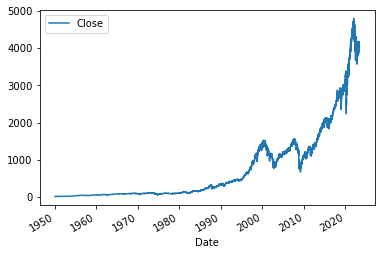

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4486130000,4090.750000
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4246510000,4061.219971
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4920090000,4136.250000


In [10]:

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype("int")

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4486130000,4090.750000,0
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4246510000,4061.219971,0
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4920090000,4136.250000,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4486130000,4090.750000,0
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4246510000,4061.219971,0
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4920090000,4136.250000,1


In [14]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [16]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.43478260869565216

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)


<AxesSubplot:xlabel='Date'>

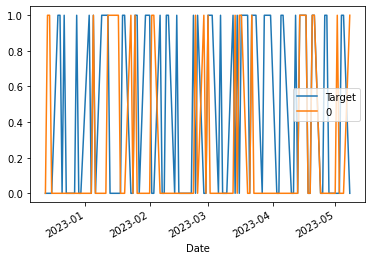

In [19]:
combined.plot(
)

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        

In [22]:
predictions = backtest(sp500, model, predictors)



In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52801289802499

In [24]:
predictions["Predictions"].value_counts()

0    3421
1    2481
Name: Predictions, dtype: int64

In [25]:
predictions["Predictions"].value_counts() / predictions.shape[0]

0    0.579634
1    0.420366
Name: Predictions, dtype: float64

In [26]:
horizons = [2, 5, 60, 250, 1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [27]:
sp500 = sp500.dropna(
)

In [28]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,3321370000,4119.580078,0,0.999807,1.0,1.011603,2.0,1.029241,30.0,1.051997,115.0,1.116138,534.0
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4486130000,4090.750000,0,0.994173,0.0,0.997561,2.0,1.017386,30.0,1.039867,114.0,1.102820,534.0
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4246510000,4061.219971,0,0.996489,0.0,0.988915,2.0,1.010351,30.0,1.032808,113.0,1.094734,533.0


In [29]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=75, random_state=1)


In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] =1
    preds[preds < 0.6] =0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(sp500, model, new_predictors)

In [32]:
predictions["Predictions"].value_counts()

0.0    4209
1.0     692
Name: Predictions, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5635838150289018